In [15]:
%matplotlib inline
import imageio
import requests
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as dp
import scipy.ndimage

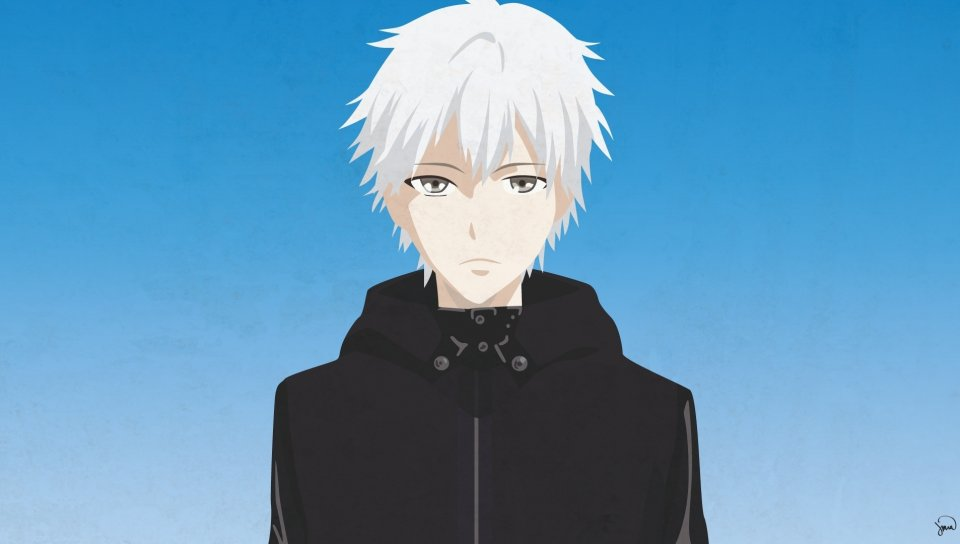

In [24]:
url = "https://www.wallpapertip.com/wmimgs/2-22629_ken-kaneki-tokyo-ghoul.jpg"
dp.Image(requests.get(url).content)

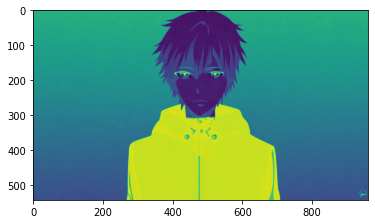

In [25]:
img = imageio.imread(url)

def grayscale(img):
  return np.dot(img[...,:3], [0.299, 0.587, 0.114])

grayscale_img = grayscale(img)
inversed_img = 255 - grayscale_img
plt.imshow(inversed_img)

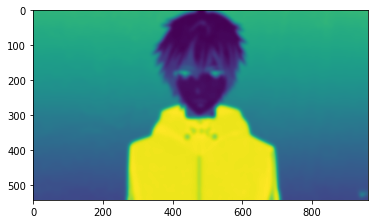

In [27]:
blurred_img = scipy.ndimage.filters.gaussian_filter(inversed_img, sigma=5)
plt.imshow(blurred_img)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


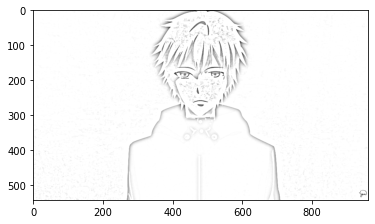

In [28]:
def mixing(blurred_img, inversed_img):
  resultant = blurred_img*255/(255-grayscale_img)
  resultant[resultant>255] = 255
  resultant[grayscale_img==255] = 255
  return resultant

pencil_img = mixing(blurred_img, inversed_img)
plt.imshow(pencil_img, cmap="gray")  

In [29]:
plt.imsave('pencil_kaniki_image.png', pencil_img, cmap='gray', vmin=0, vmax=255)